In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-02-16 05:58:56,104: Default instance: ibm-q/open/main


In [2]:
# Importing standard Qiskit libraries
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import Parameter
from qiskit_aer.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.opflow.primitive_ops import PauliSumOp

In [3]:
paulis = ['Z']
weights = [1]
pauli_op = [([pauli,weight]) for pauli,weight in zip(paulis,weights)]
hamiltonian1 = PauliSumOp.from_list([ op for op in pauli_op ])
print(hamiltonian1)

1.0 * Z


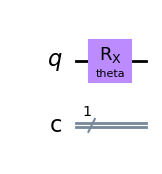

In [4]:
theta = Parameter('theta')
ansatz_1 = QuantumCircuit(1, 1)
ansatz_1.rx(theta, 0)
ansatz_1.draw(style='clifford')

In [5]:
vqe_solver=VQE(estimator=Estimator(approximation=True), 
               ansatz=ansatz_1, optimizer=SLSQP(maxiter=100))
result_vqe = vqe_solver.compute_minimum_eigenvalue(operator=hamiltonian1) 
vqe_res1 = result_vqe.optimal_value
print('VQE Result of H=Z : ', vqe_res1)

VQE Result of H=Z :  -0.9999999999894565


In [6]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import Parameter
from qiskit_aer.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.opflow.primitive_ops import PauliSumOp

In [7]:
paulis = ['Z','X','I']
weights = [3,2,2]
pauli_op = [([pauli,weight]) for pauli,weight in zip(paulis,weights)]
hamiltonian2 = PauliSumOp.from_list([ op for op in pauli_op ])
print(hamiltonian2)

3.0 * Z
+ 2.0 * X
+ 2.0 * I


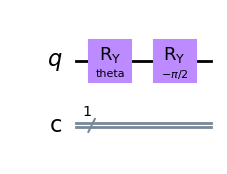

In [8]:
theta = Parameter('theta')
ansatz_2 = QuantumCircuit(1, 1)
ansatz_2.ry(theta, 0)
ansatz_2.ry(-np.pi/2, 0)
ansatz_2.draw(style='clifford')

In [9]:
vqe_solver=VQE(estimator=Estimator(approximation=True), 
               ansatz=ansatz_2, optimizer=SLSQP(maxiter=100))
result_vqe = vqe_solver.compute_minimum_eigenvalue(operator=hamiltonian2) 
vqe_res1 = result_vqe.optimal_value
print('VQE Result of H=3Z + 2X + 2I: ', vqe_res1)

VQE Result of H=3Z + 2X + 2I:  -1.6055512740263804
